In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from datascience import Table
from datascience.predicates import are
df = pd.read_stata('rd_analysis.dta').dropna(subset=['turnout_party_share'])

In [33]:
extremist=Table.from_df(df[['rv', 'treat', 'turnout_party_share', 'low_info_turnout_party', 'high_info_turnout_party','low_info_turnout_opp_party','high_info_turnout_opp_party'  ]].dropna())

Use the `stats.ttest_ind` function to do a difference of means test for whether there is a meaningful difference in the turn out of the party when the candidate wins versus when they dont. 

In [34]:
low_won_opp=extremist.where('treat', 1).column('low_info_turnout_opp_party')
low_lose_opp=extremist.where('treat', 0).column('low_info_turnout_opp_party')
stats.ttest_ind(low_lose_opp, low_won_opp)

Ttest_indResult(statistic=-1.0256671245668916, pvalue=0.30573719284698475)

In [35]:
high_won_opp=extremist.where('treat', 1).column('high_info_turnout_opp_party')
high_lose_opp=extremist.where('treat', 0).column('high_info_turnout_opp_party')
stats.ttest_ind(high_won_opp, high_lose_opp)

Ttest_indResult(statistic=1.6139387807001697, pvalue=0.10741684526167859)

In [36]:
high_won=extremist.where('treat', 1).column('high_info_turnout_party')
high_lose=extremist.where('treat', 0).column('high_info_turnout_party')
stats.ttest_ind(high_won, high_lose)

Ttest_indResult(statistic=-0.16101698170341555, pvalue=0.8721703451934503)

In [37]:
low_won=extremist.where('treat', 1).column('low_info_turnout_party')
low_lose=extremist.where('treat', 0).column('low_info_turnout_party')
stats.ttest_ind(lowwon, lowlose)

Ttest_indResult(statistic=-0.346446096980798, pvalue=0.7292098875508181)

In [38]:
won=extremist.where('treat', 1).column('turnout_party_share')
lost=extremist.where('treat', 0).column('turnout_party_share')

In [30]:
t_test = stats.ttest_ind(lost, won)
t_test

Ttest_indResult(statistic=1.5450154343694895, pvalue=0.12322110705731085)

In [17]:
X= sm.add_constant(extremists['treat'])
y= extremists['turnout_party_share']
lm = sm.OLS(y, X).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     turnout_party_share   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     2.387
Date:                 Fri, 13 Nov 2020   Prob (F-statistic):              0.123
Time:                         12:56:29   Log-Likelihood:                 263.46
No. Observations:                  362   AIC:                            -522.9
Df Residuals:                      360   BIC:                            -515.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5052      0.009     59.26

In [168]:
# X_var = extremist.drop('rv')
# y_var= extremist.column('rv')
X_var = sm.add_constant(extremists.drop(['treat'], axis= 1))
y_var= extremists[['treat']]

In [169]:
m = sm.OLS.from_formula('treat ~ turnout_party_share + high_info_turnout_opp_party + low_info_turnout_opp_party + high_info_turnout_party + low_info_turnout_party', extremist)
linearmodel = sm.OLS(y_var, X_var).fit()
print(linearmodel.summary())
print('Parameters: ', linearmodel.params)

                            OLS Regression Results                            
Dep. Variable:                  treat   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.03e-76
Time:                        13:57:19   Log-Likelihood:                -74.983
No. Observations:                 362   AIC:                             164.0
Df Residuals:                     355   BIC:                             191.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [170]:
results = m.fit()

In [171]:
print('Parameters: ', results.params)

Parameters:  Intercept                      0.436248
turnout_party_share           -0.235485
high_info_turnout_opp_party    0.318358
low_info_turnout_opp_party     0.072535
high_info_turnout_party       -0.124747
low_info_turnout_party        -0.069854
dtype: float64


In [172]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  treat   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9989
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.418
Time:                        13:57:21   Log-Likelihood:                -259.86
No. Observations:                 362   AIC:                             531.7
Df Residuals:                     356   BIC:                             555.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [173]:
print('Parameters: ', results.params)

Parameters:  Intercept                      0.436248
turnout_party_share           -0.235485
high_info_turnout_opp_party    0.318358
low_info_turnout_opp_party     0.072535
high_info_turnout_party       -0.124747
low_info_turnout_party        -0.069854
dtype: float64


c:\users\5mika\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


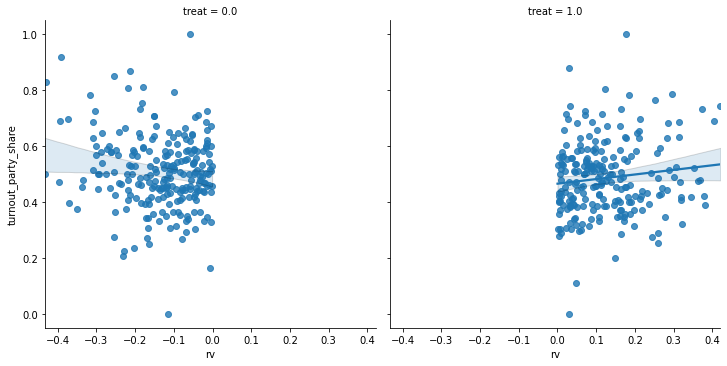

In [192]:
sns.lmplot('rv', 'turnout_party_share', data=df, col='treat')

<AxesSubplot:>

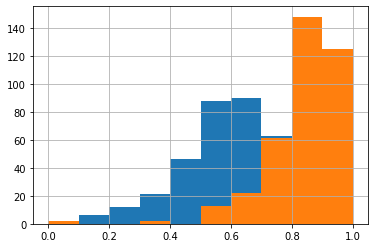

In [3]:
df['low_info_turnout_party'].hist()
df['high_info_turnout_party'].hist()

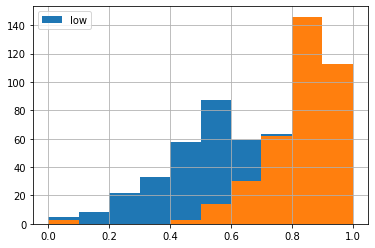

In [4]:
df['low_info_turnout_opp_party'].hist(label='low')
df['high_info_turnout_opp_party'].hist()
plt.legend()